## Analysis of bulk SLAM-seq brain samples

Experiment: injection of 4SU by different methods (intraperitoneal vs brain ventricular injection) done by Klara, for the purpose of assessing best method of delivery. I prepared bulk libraries from brains divided into telencephalon and rest.
Data has been mapped by Anika according to her pipeline. As a first step I calculate the bulk conversion rates for all samples.

In [9]:
library(reshape2)
library(ggplot2)

In [4]:
#Anika has provided the following function for obtaining mutation rates
makeMutationTable <- function(mutations, nucleotides) {
  mutation_occurences <-read.table(file = mutations, sep = '\t', header = FALSE)
  nucleotide_numbers <- read.table(file = nucleotides, sep = "\t", header = FALSE)

  mutationTableA <- subset(mutation_occurences, V1=="AC")
  mutationTableA <- rbind(mutationTableA, subset(mutation_occurences, V1=="AG"))
  mutationTableA <- rbind(mutationTableA, subset(mutation_occurences, V1=="AT"))
  mutationTableT <- subset(mutation_occurences, V1=="TC")
  mutationTableT <- rbind(mutationTableT, subset(mutation_occurences, V1=="TG"))
  mutationTableT <- rbind(mutationTableT, subset(mutation_occurences, V1=="TA"))
  mutationTableC <- subset(mutation_occurences, V1=="CT")
  mutationTableC <- rbind(mutationTableC, subset(mutation_occurences, V1=="CG"))
  mutationTableC <- rbind(mutationTableC, subset(mutation_occurences, V1=="CA"))
  mutationTableG <- subset(mutation_occurences, V1=="GT")
  mutationTableG <- rbind(mutationTableG, subset(mutation_occurences, V1=="GC"))
  mutationTableG <- rbind(mutationTableG, subset(mutation_occurences, V1=="GA"))

  mutationTableA$Freq <- (mutationTableA$V2/subset(nucleotide_numbers, V1 == "A")$V2)*100
  mutationTableT$Freq <- (mutationTableT$V2/subset(nucleotide_numbers, V1 == "T")$V2)*100
  mutationTableC$Freq <- (mutationTableC$V2/subset(nucleotide_numbers, V1 == "C")$V2)*100
  mutationTableG$Freq <- (mutationTableG$V2/subset(nucleotide_numbers, V1 == "G")$V2)*100

  mutationFrequencyTable <- rbind(mutationTableA, mutationTableC, mutationTableG, mutationTableT)
  return(mutationFrequencyTable)
}

In [41]:
#code for loading in a single table:
mutations_allReads <- "/local/Nina/slamseq/20211122_bulk_munich/A5.fastq/Aligned.out_MTabs_mutation_occurences_20_0N.txt"
nucleotides_allReads <-  "/local/Nina/slamseq/20211122_bulk_munich/A5.fastq/Aligned.out_MTabs_nucleotide_counts_Q20_C0N.txt"

mutRates_allReads <- makeMutationTable(mutations_allReads, nucleotides_allReads)
mutRates_allReads$V2 <- NULL
colnames(mutRates_allReads) <- c("mut", "all reads")
mutRates_allReads <- melt(mutRates_allReads, ID = mut)

mutRates_allReads

Using mut as id variables



mut,variable,value
<chr>,<fct>,<dbl>
AC,all reads,0.08797956
AG,all reads,0.30021885
AT,all reads,0.12773857
CT,all reads,0.50341311
CG,all reads,0.07969026
CA,all reads,0.48554910
GT,all reads,0.11925204
GC,all reads,0.07939499
GA,all reads,1.20376377


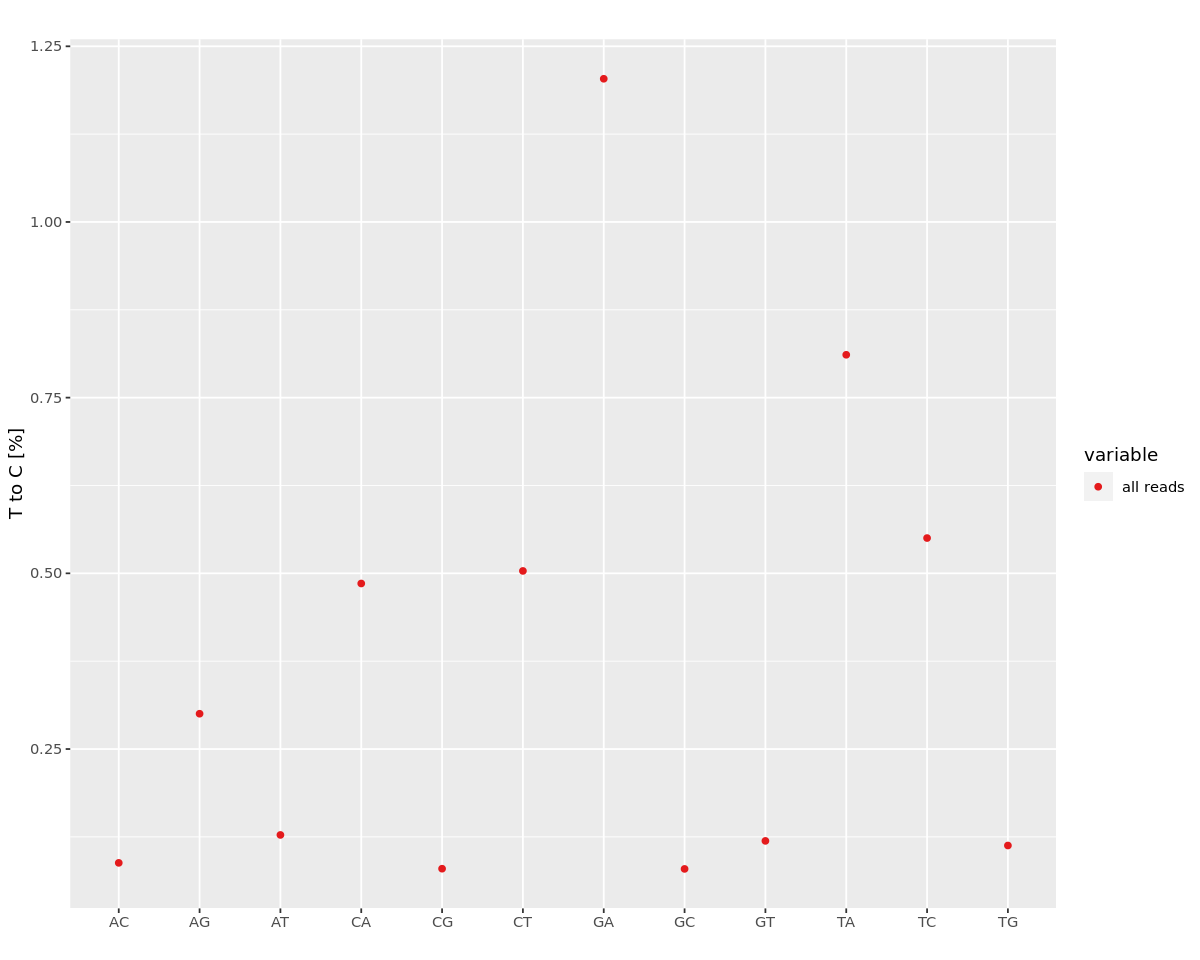

In [43]:
#for plotting:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data = mutRates_allReads, mapping = aes(x = mut, y = value, color = variable)) +
  geom_point() +
  xlab("") +
  ylab("T to C [%]") +
  scale_color_brewer(type = "qual", palette = "Set1") +
  ggtitle("")

I would like to merge all my samples into a single data frame for combined plotting. I first prepare a data frame of my sample names and associated barcodes (this was exported from my lab book as csv (via Excel) that I load in here).

In [13]:
brains_input <- read.csv(file = "/local/Nina/slamseq/20211122_bulk_munich/20211119_samples_overview.csv", sep = ";")
brains_input

sample_label,condition,brain_reg,index,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1a,IV_veh_5ul,tel,A5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2a,IV_veh_5ul,tel,B5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3a,IV_veh_5ul,tel,C5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4a,IV_4SU_5ul,tel,D5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5a,IV_4SU_3ul,tel,E5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6a,IV_4SU_3ul,tel,F5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7a,IV_4SU_3ul,tel,G5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8a,IP_4SU_25ul,tel,H5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9a,IP_4SU_25ul,tel,A8,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


sample_label,condition,brain_reg,index
<chr>,<chr>,<chr>,<chr>
1a,IV_veh_5ul,tel,A5
2a,IV_veh_5ul,tel,B5
3a,IV_veh_5ul,tel,C5
4a,IV_4SU_5ul,tel,D5
5a,IV_4SU_3ul,tel,E5
6a,IV_4SU_3ul,tel,F5
7a,IV_4SU_3ul,tel,G5
8a,IP_4SU_25ul,tel,H5
9a,IP_4SU_25ul,tel,A8


In [14]:
#clean up
brains_input <- brains_input[,c(1:4)]
brains_input

sample_label,condition,brain_reg,index
<chr>,<chr>,<chr>,<chr>
1a,IV_veh_5ul,tel,A5
2a,IV_veh_5ul,tel,B5
3a,IV_veh_5ul,tel,C5
4a,IV_4SU_5ul,tel,D5
5a,IV_4SU_3ul,tel,E5
6a,IV_4SU_3ul,tel,F5
7a,IV_4SU_3ul,tel,G5
8a,IP_4SU_25ul,tel,H5
9a,IP_4SU_25ul,tel,A8


In [16]:
#add column with fullname in case I need this ID later
brains_input$fullname <- paste0(brains_input$condition, "_", brains_input$brain_reg)

For loading them together I run a for loop over the celseq3 indices listed in the table.

In [36]:
#make mutation tables for all samples
index_all <- as.character(brains_input$index)
samples_dir_pt1 <- "/local/Nina/slamseq/20211122_bulk_munich/"
samples_dir_pt2_mut <- ".fastq/Aligned.out_MTabs_mutation_occurences_20_0N.txt"
samples_dir_pt2_nuc <- ".fastq/Aligned.out_MTabs_nucleotide_counts_Q20_C0N.txt"

mutRates_allReads_allSamples <- data.frame()

for (i in seq_along(index_all)){
 sample <- index_all[i]
 mutations_allReads <- paste0(samples_dir_pt1, sample, samples_dir_pt2_mut)
 nucleotides_allReads <- paste0(samples_dir_pt1, sample, samples_dir_pt2_nuc)
 mutRates_allReads <- makeMutationTable(mutations_allReads, nucleotides_allReads)
 mutRates_allReads$V2 <- NULL
 colnames(mutRates_allReads) <- c("mut", "all reads")
 mutRates_allReads <- melt(mutRates_allReads, ID = mut)
 mutRates_allReads$index <- sample
 mutRates_allReads_allSamples <- rbind(mutRates_allReads_allSamples, mutRates_allReads)
}

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables

Using mut as id variables



In [37]:
mutRates_allReads_allSamples

mut,variable,value,index
<chr>,<fct>,<dbl>,<chr>
AC,all reads,0.08797956,A5
AG,all reads,0.30021885,A5
AT,all reads,0.12773857,A5
CT,all reads,0.50341311,A5
CG,all reads,0.07969026,A5
CA,all reads,0.48554910,A5
GT,all reads,0.11925204,A5
GC,all reads,0.07939499,A5
GA,all reads,1.20376377,A5


In [94]:
#seems accurate!
table(mutRates_allReads_allSamples$index)


A5 A7 A8 B5 B7 B8 C5 C7 C8 D5 D7 D8 E5 E7 F5 F7 G5 G7 H5 H7 
12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 

In [40]:
#for full plotting options I can merge this with my original sample description data frame
mutRates_extended <- merge(mutRates_allReads_allSamples, brains_input)
mutRates_extended

index,mut,variable,value,sample_label,condition,brain_reg,fullname
<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>
A5,AC,all reads,0.08797956,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,AG,all reads,0.30021885,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,AT,all reads,0.12773857,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,CT,all reads,0.50341311,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,CG,all reads,0.07969026,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,CA,all reads,0.48554910,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,GT,all reads,0.11925204,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,GC,all reads,0.07939499,1a,IV_veh_5ul,tel,IV_veh_5ul_tel
A5,GA,all reads,1.20376377,1a,IV_veh_5ul,tel,IV_veh_5ul_tel


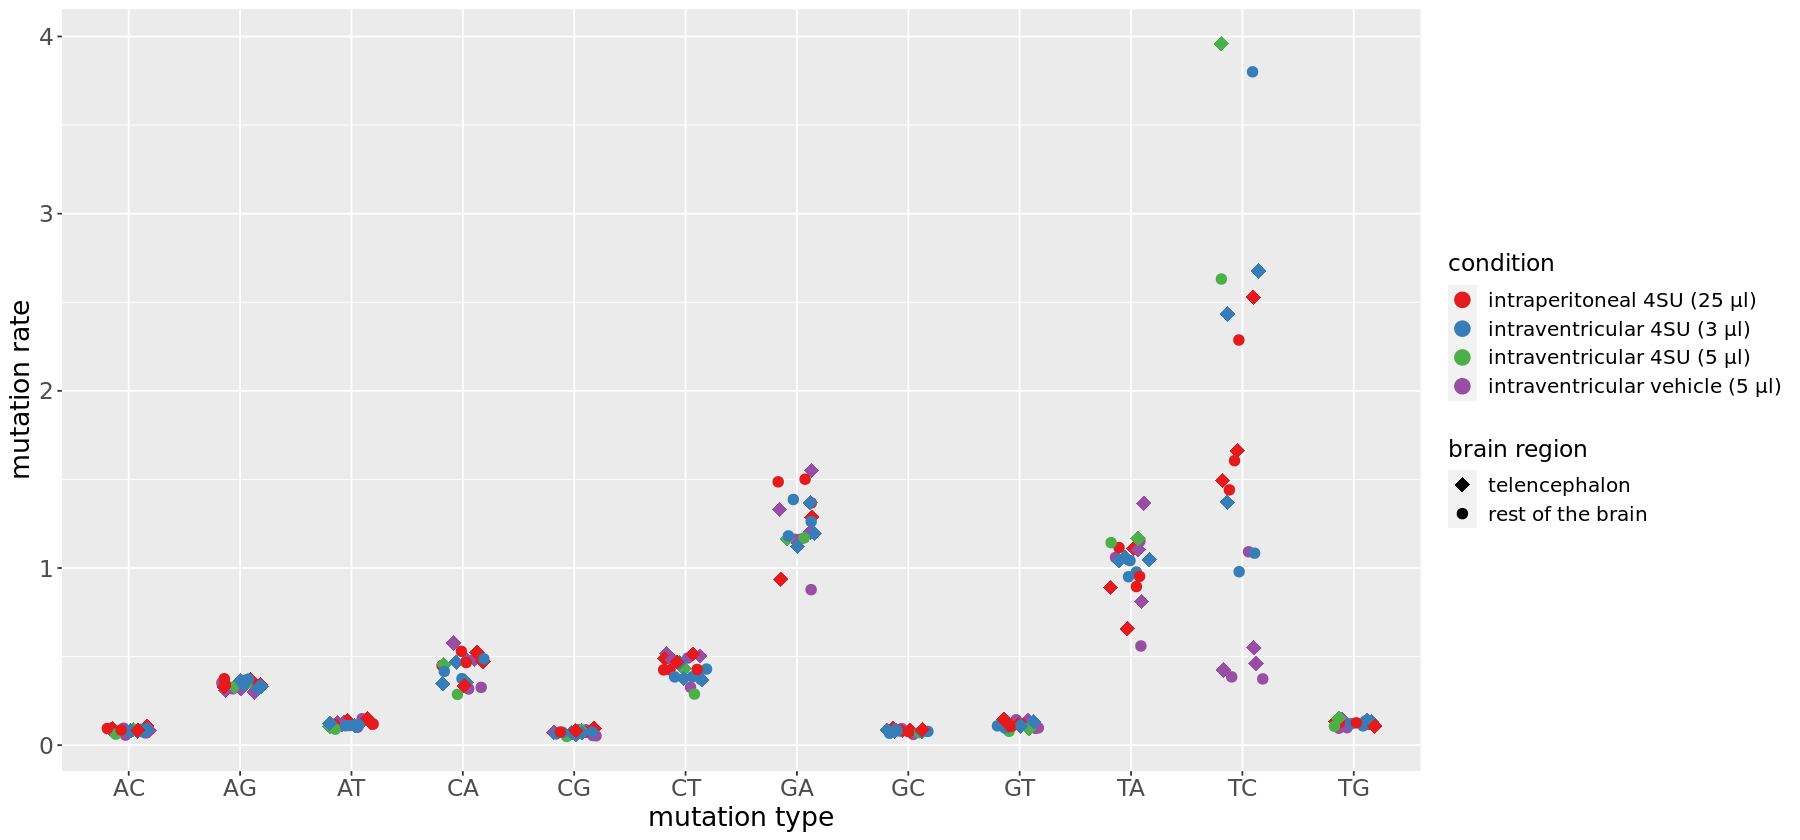

In [96]:
#for plotting:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(data = mutRates_extended, mapping = aes(x = mut, y = value, color = condition, shape = brain_reg)) +
  geom_jitter(size = 4, width = 0.2) +
  xlab("mutation type") +
  ylab("mutation rate") +
  scale_color_brewer(type = "qual", palette = "Set1",
                     breaks = c("IP_4SU_25ul", "IV_4SU_3ul", "IV_4SU_5ul", "IV_veh_5ul"), 
                     labels = c("intraperitoneal 4SU (25 µl)", "intraventricular 4SU (3 µl)", "intraventricular 4SU (5 µl)", "intraventricular vehicle (5 µl)")) +
  scale_shape_manual(name = "brain region", values=c(18, 20), breaks = c("tel", "rest"), labels = c("telencephalon", "rest of the brain")) +
  theme(axis.title = element_text(size = 16), axis.text = element_text(size = 14), legend.title = element_text(size = 14), legend.text = element_text(size = 12))

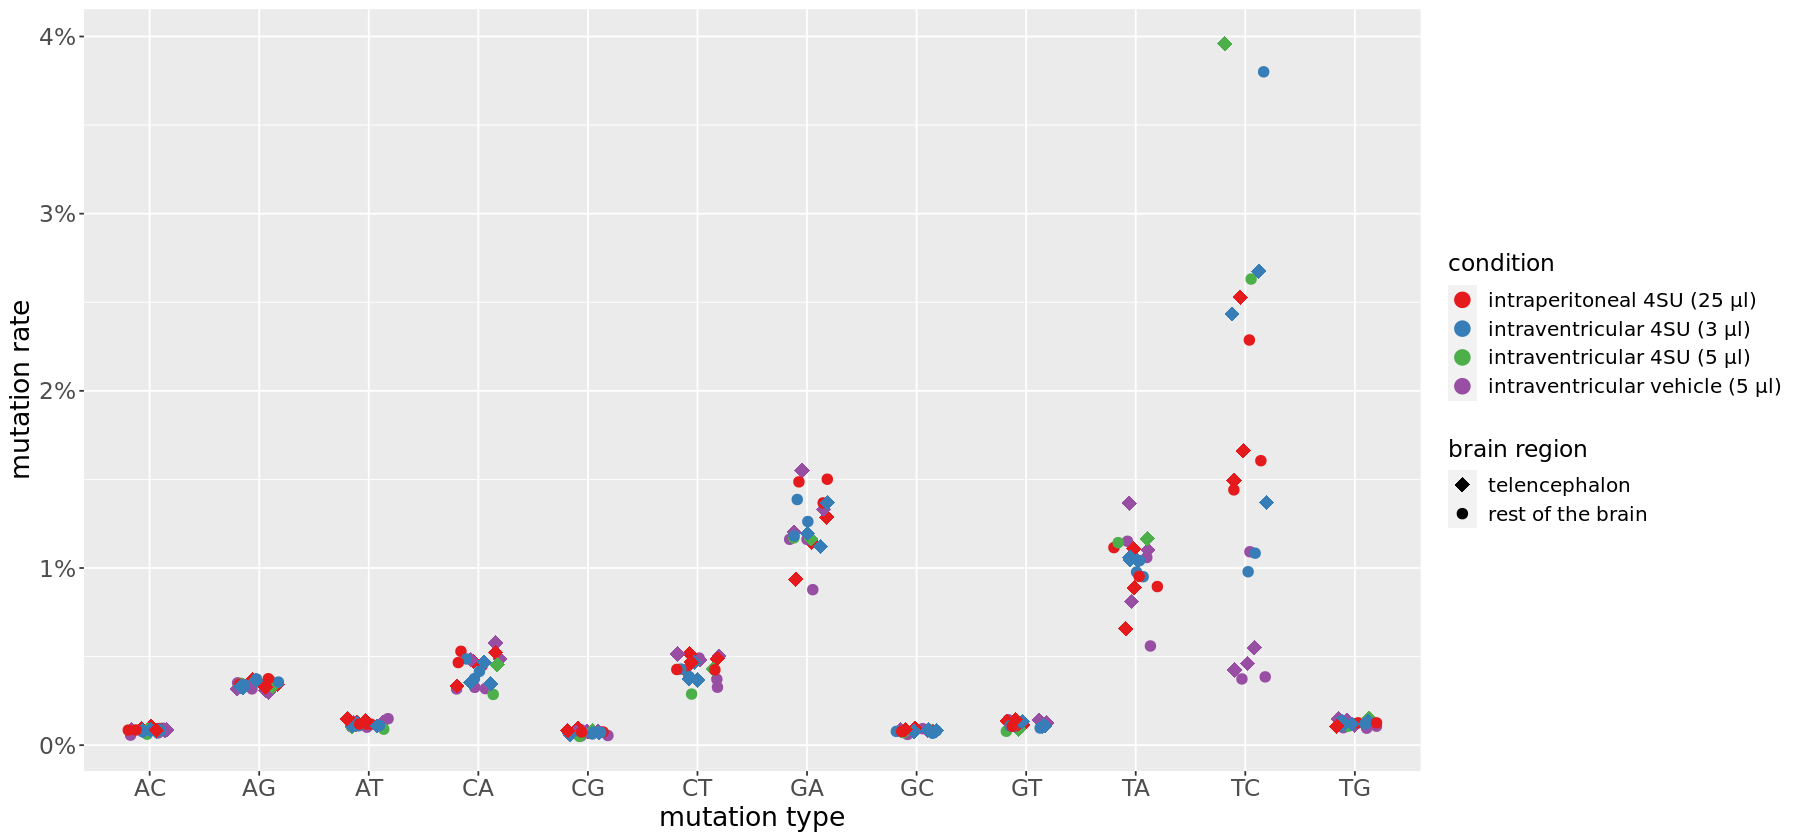

In [100]:
#for plotting, add percentage labels to y axis:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(data = mutRates_extended, mapping = aes(x = mut, y = value, color = condition, shape = brain_reg)) +
  geom_jitter(size = 4, width = 0.2) +
  xlab("mutation type") +
  ylab("mutation rate") +
  scale_y_continuous(breaks = c(0, 1, 2, 3, 4), labels = c("0%", "1%", "2%", "3%", "4%")) +
  scale_color_brewer(type = "qual", palette = "Set1",
                     breaks = c("IP_4SU_25ul", "IV_4SU_3ul", "IV_4SU_5ul", "IV_veh_5ul"), 
                     labels = c("intraperitoneal 4SU (25 µl)", "intraventricular 4SU (3 µl)", "intraventricular 4SU (5 µl)", "intraventricular vehicle (5 µl)")) +
  scale_shape_manual(name = "brain region", values=c(18, 20), breaks = c("tel", "rest"), labels = c("telencephalon", "rest of the brain")) +
  theme(axis.title = element_text(size = 16), axis.text = element_text(size = 14), legend.title = element_text(size = 14), legend.text = element_text(size = 12))

In [101]:
#save plot:
plot_bulk <- ggplot(data = mutRates_extended, mapping = aes(x = mut, y = value, color = condition, shape = brain_reg)) +
  geom_jitter(size = 4, width = 0.2) +
  xlab("mutation type") +
  ylab("mutation rate") +
  scale_y_continuous(breaks = c(0, 1, 2, 3, 4), labels = c("0%", "1%", "2%", "3%", "4%")) +
  scale_color_brewer(type = "qual", palette = "Set1",
                     breaks = c("IP_4SU_25ul", "IV_4SU_3ul", "IV_4SU_5ul", "IV_veh_5ul"), 
                     labels = c("intraperitoneal 4SU (25 µl)", "intraventricular 4SU (3 µl)", "intraventricular 4SU (5 µl)", "intraventricular vehicle (5 µl)")) +
  scale_shape_manual(name = "brain region", values=c(18, 20), breaks = c("tel", "rest"), labels = c("telencephalon", "rest of the brain")) +
  theme(axis.title = element_text(size = 16), axis.text = element_text(size = 14), legend.title = element_text(size = 14), legend.text = element_text(size = 12))

ggsave(plot_bulk, file = "/local/Nina/slamseq/20211122_bulk_munich/plots/bulk_mut_rates.pdf", device = "pdf", height = 7, width = 15, dpi = 300)

In [69]:
mutRates_extended[which(mutRates_extended$condition == "IV_4SU_3ul" & mutRates_extended$mut == "TC"),]

,index,mut,variable,value,sample_label,condition,brain_reg,fullname
,<chr>,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>
154,E5,TC,all reads,2.4344653,5a,IV_4SU_3ul,tel,IV_4SU_3ul_tel
166,E7,TC,all reads,0.9789745,5b,IV_4SU_3ul,rest,IV_4SU_3ul_rest
178,F5,TC,all reads,2.6756881,6a,IV_4SU_3ul,tel,IV_4SU_3ul_tel
190,F7,TC,all reads,3.8005972,6b,IV_4SU_3ul,rest,IV_4SU_3ul_rest
202,G5,TC,all reads,1.3713162,7a,IV_4SU_3ul,tel,IV_4SU_3ul_tel
214,G7,TC,all reads,1.0835964,7b,IV_4SU_3ul,rest,IV_4SU_3ul_rest


In [77]:
#add column with same brain indicated for a and b by removing the last element of the string (letter denoting a for tel or b for rest)
mutRates_extended$sample_id <- substr(mutRates_extended$sample_label,1,nchar(mutRates_extended$sample_label)-1)

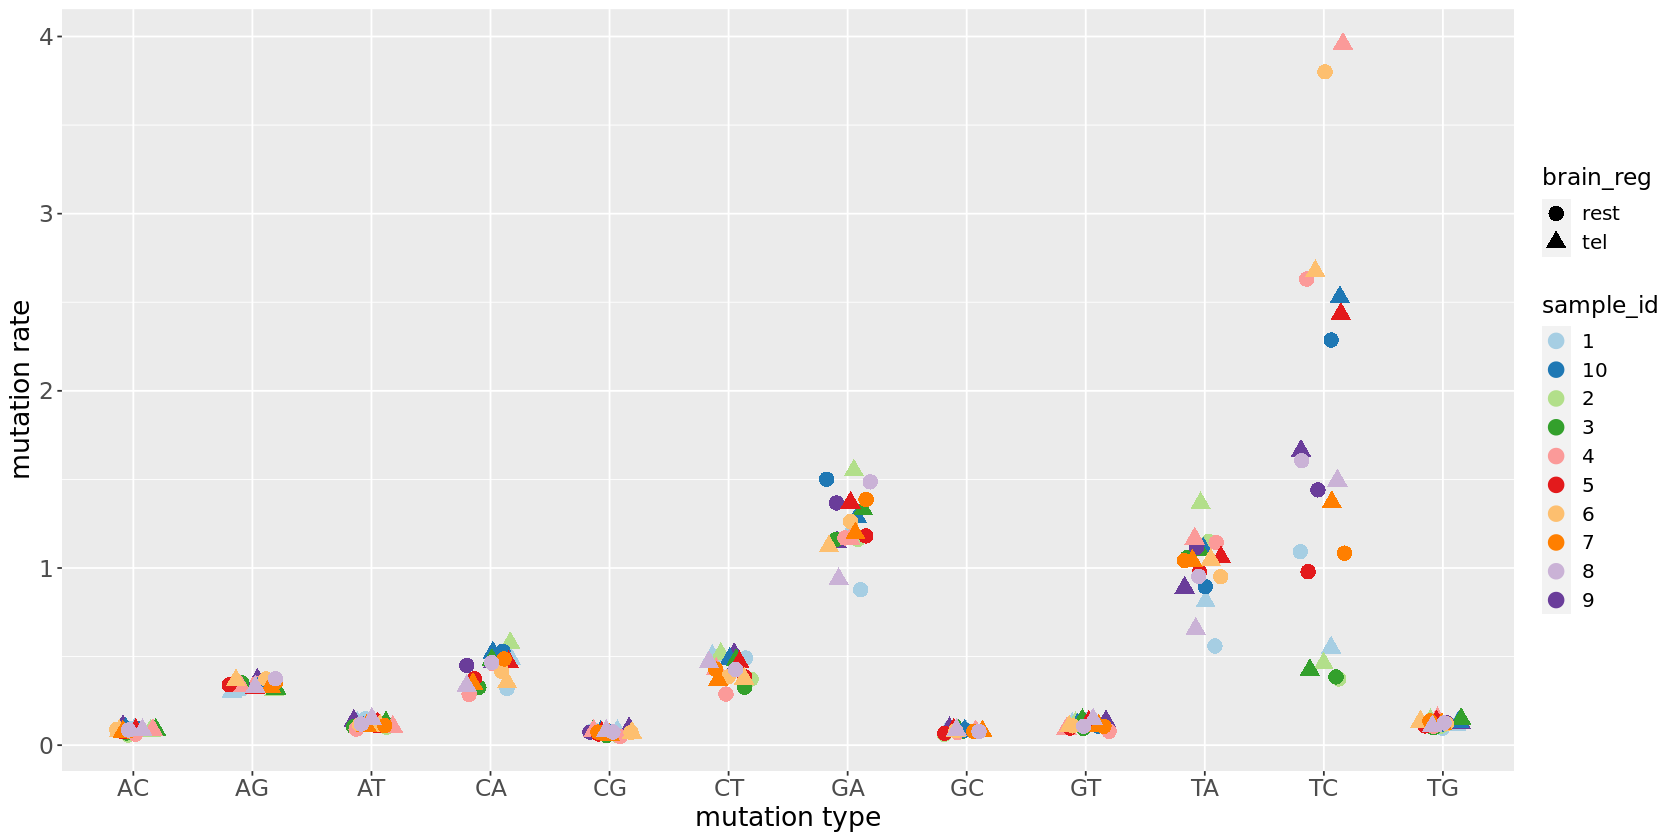

In [78]:
#plot to highlight differences between brain regions within same sample:
options(repr.plot.width=14, repr.plot.height=7)
ggplot(data = mutRates_extended, mapping = aes(x = mut, y = value, color = sample_id, shape = brain_reg)) +
  geom_jitter(size = 4, width = 0.2) +
  xlab("mutation type") +
  ylab("mutation rate") +
  theme(axis.title = element_text(size = 16), axis.text = element_text(size = 14), legend.title = element_text(size = 14), 
        legend.text = element_text(size = 12)) +
  scale_color_brewer(type = "qual", palette = "Paired")